<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/V9_Analysis_of_5_clusters_features_loadings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This version based on un-normalize data

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters"

Mounted at /content/drive
cluster_1.csv  cluster_2.csv  cluster_3.csv  cluster_4.csv  cluster_5.csv


# path

In [3]:
output_dir = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters"
cluster_paths = []
for i in range(1, 6):
    path = os.path.join(output_dir,f'cluster_{i}.csv')
    print(path)
    cluster_paths.append(path)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_1.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_2.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_3.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_4.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_5.csv


# functions

In [4]:
def step_0_load(path_list):
    df_list = []
    for path in path_list:
        df = pd.read_csv(path, low_memory=False, index_col=False)
        df_list.append(df)
    return df_list

In [13]:
def box_plot(dfs, col_name):
    # Create a 2x3 grid of plots
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Remove the last subplot since we only have 5 dataframes
    axes[2, 1].axis('off')

    # Plot each dataframe
    for i, df in enumerate(dfs):
        row = i // 2
        col = i % 2
        sns.boxplot(y=df[col_name], ax=axes[row, col])
        axes[row, col].set_title(f'DataFrame {i+1}')

    plt.tight_layout()
    plt.show()


In [12]:
def info(dfs, col_name):
    # Print mean value for each dataframe
    for i, df in enumerate(dfs):
        mean_value = df[col_name].mean()
        sum_value = df[col_name].sum()
        print(f"Mean and Sum value of {col_name} in DataFrame {i+1}: {mean_value:.2f}, {sum_value:.2f}")


In [5]:
dfs = step_0_load(cluster_paths)

In [22]:
loading_features = [ "MOOD",
"PAIN",
"age",
"BMIClass_Obesity 2",
"birth_MAYBE",
"stress",
"ALCOHOL",
"hasEverHadWeightGoal",
"citizenHeight",
"receivedMessageCount",
"max_messagetext_length",
"hasEndedAdvisory",
"MEDICINE",
"advisorId",
"DIET_RULES",
"BMIClass_Underweight",
"citizenId",
"hasEverHadActivityGoal",
]

MOOD
Mean and Sum value of MOOD in DataFrame 1: 3.61, 148.00
Mean and Sum value of MOOD in DataFrame 2: 1.96, 298.00
Mean and Sum value of MOOD in DataFrame 3: 31.19, 3836.00
Mean and Sum value of MOOD in DataFrame 4: 0.30, 13.00
Mean and Sum value of MOOD in DataFrame 5: 0.00, 0.00


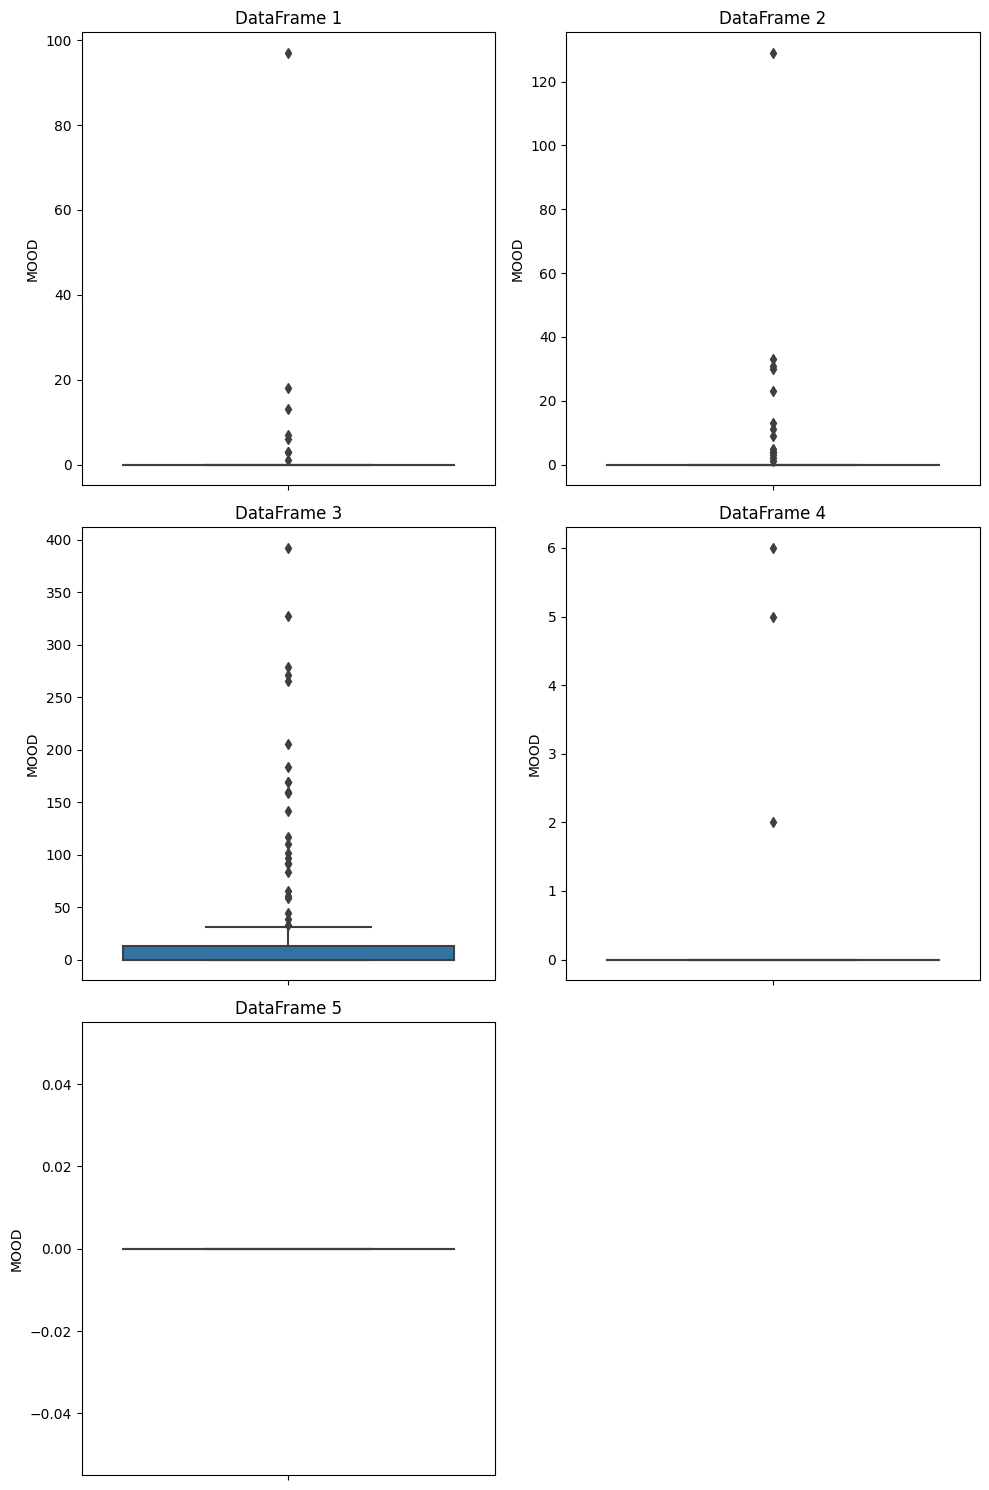

PAIN
Mean and Sum value of PAIN in DataFrame 1: 2.41, 99.00
Mean and Sum value of PAIN in DataFrame 2: 0.22, 33.00
Mean and Sum value of PAIN in DataFrame 3: 10.24, 1259.00
Mean and Sum value of PAIN in DataFrame 4: 0.25, 11.00
Mean and Sum value of PAIN in DataFrame 5: 0.00, 0.00


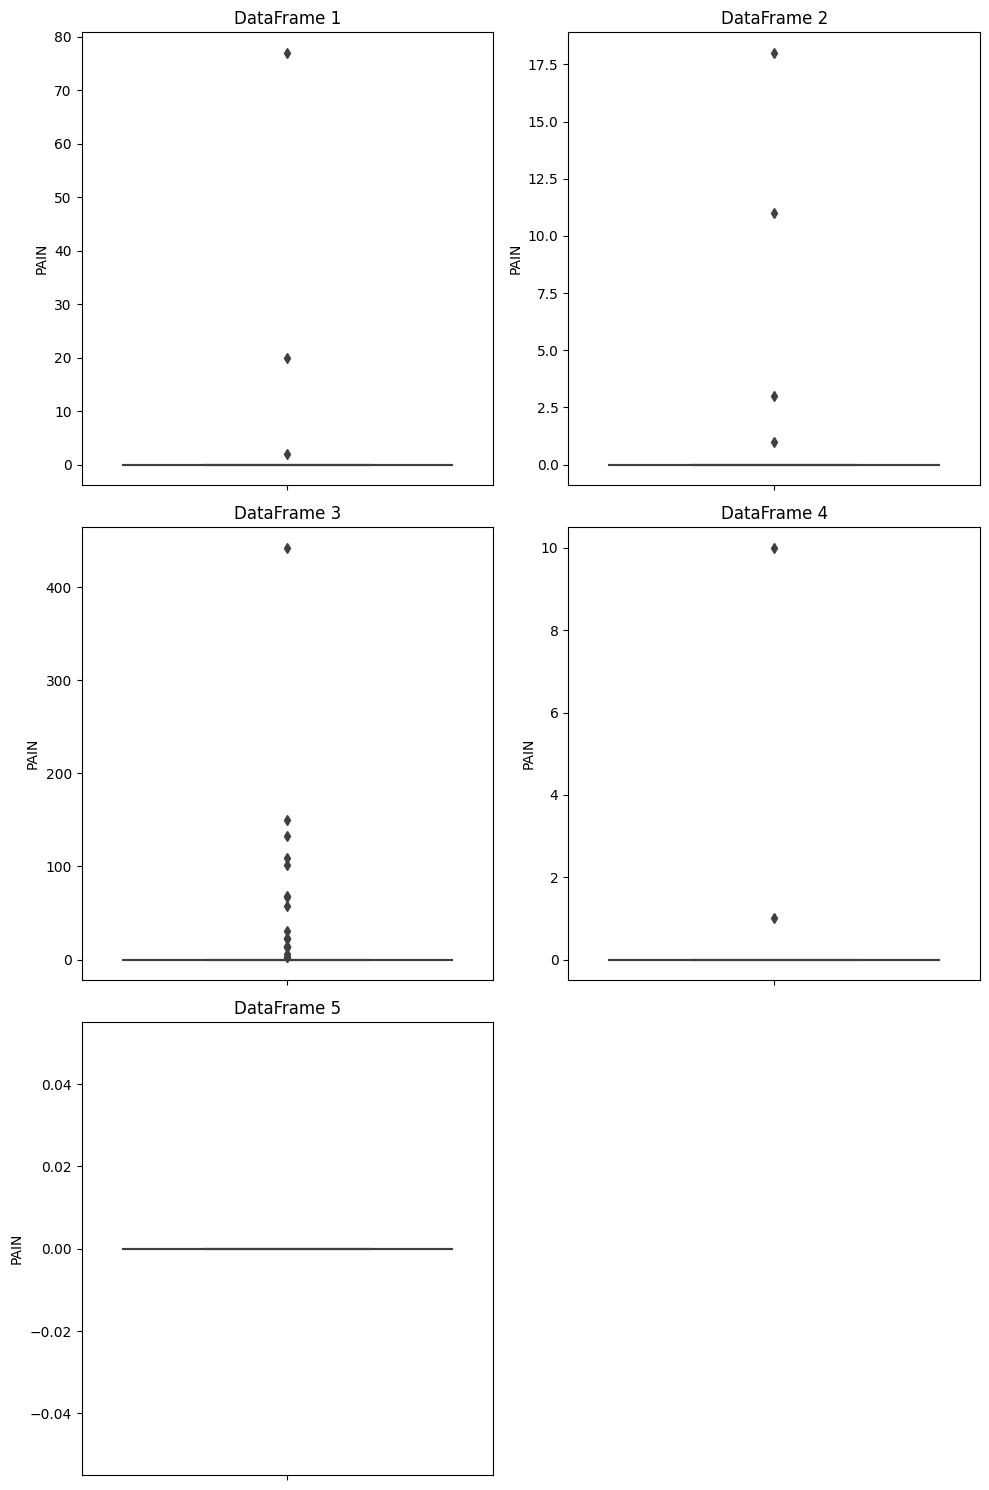

age
Mean and Sum value of age in DataFrame 1: 47.02, 1928.00
Mean and Sum value of age in DataFrame 2: 37.29, 5668.00
Mean and Sum value of age in DataFrame 3: 38.15, 4693.00
Mean and Sum value of age in DataFrame 4: 39.86, 1754.00
Mean and Sum value of age in DataFrame 5: 34.57, 242.00


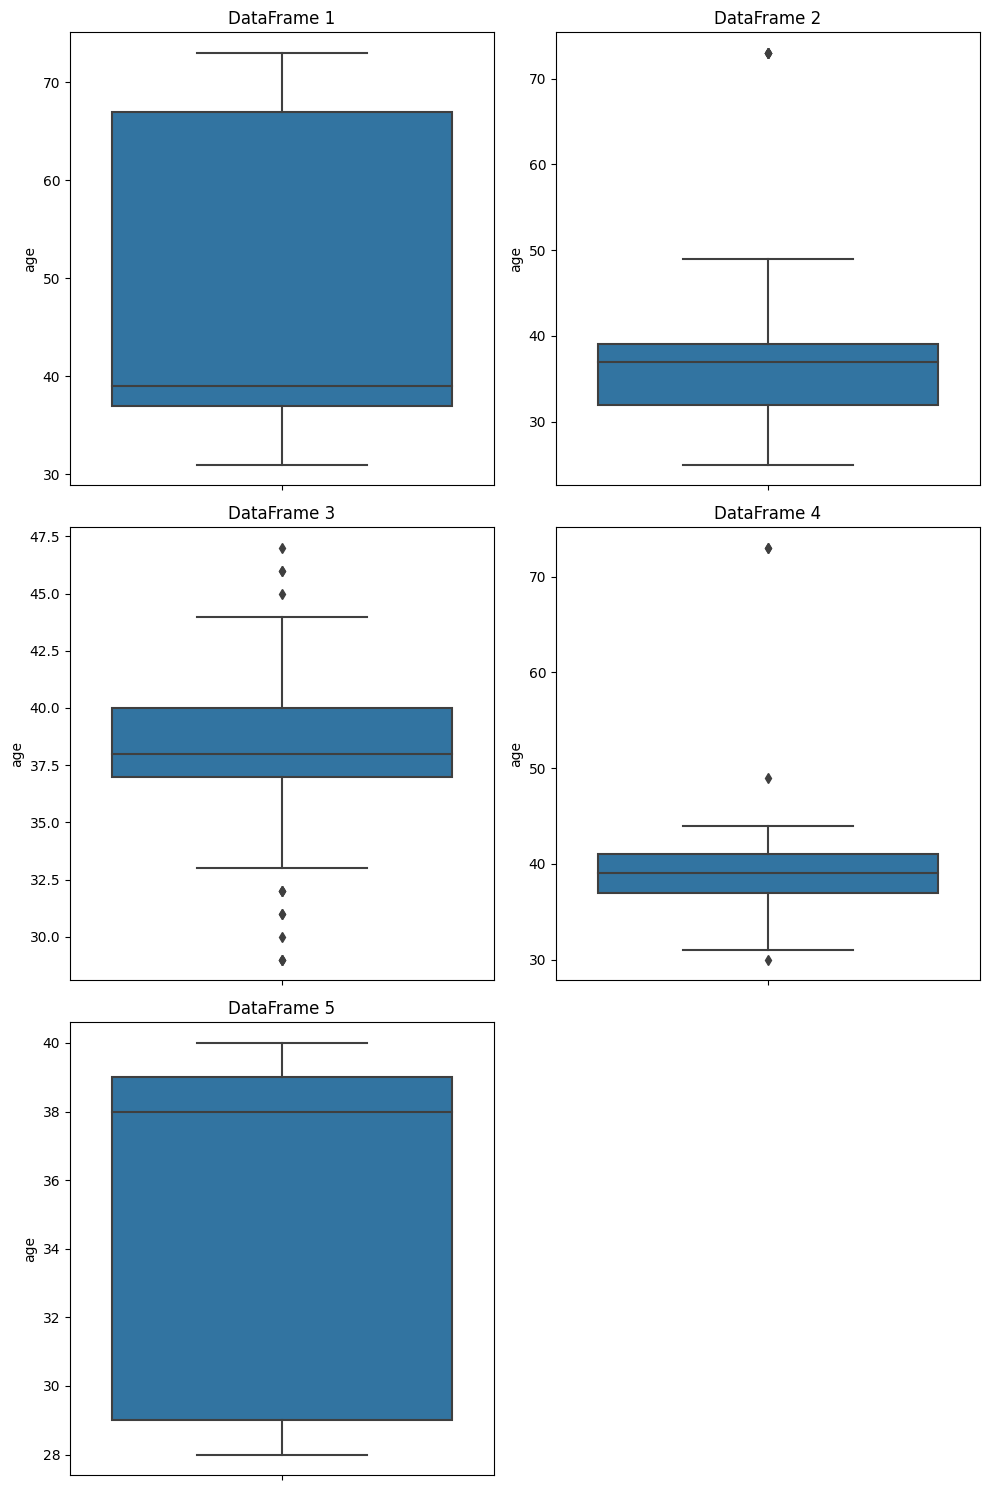

BMIClass_Obesity 2
Mean and Sum value of BMIClass_Obesity 2 in DataFrame 1: 0.07, 3.00
Mean and Sum value of BMIClass_Obesity 2 in DataFrame 2: 0.12, 18.00
Mean and Sum value of BMIClass_Obesity 2 in DataFrame 3: 0.08, 10.00
Mean and Sum value of BMIClass_Obesity 2 in DataFrame 4: 0.07, 3.00
Mean and Sum value of BMIClass_Obesity 2 in DataFrame 5: 0.00, 0.00


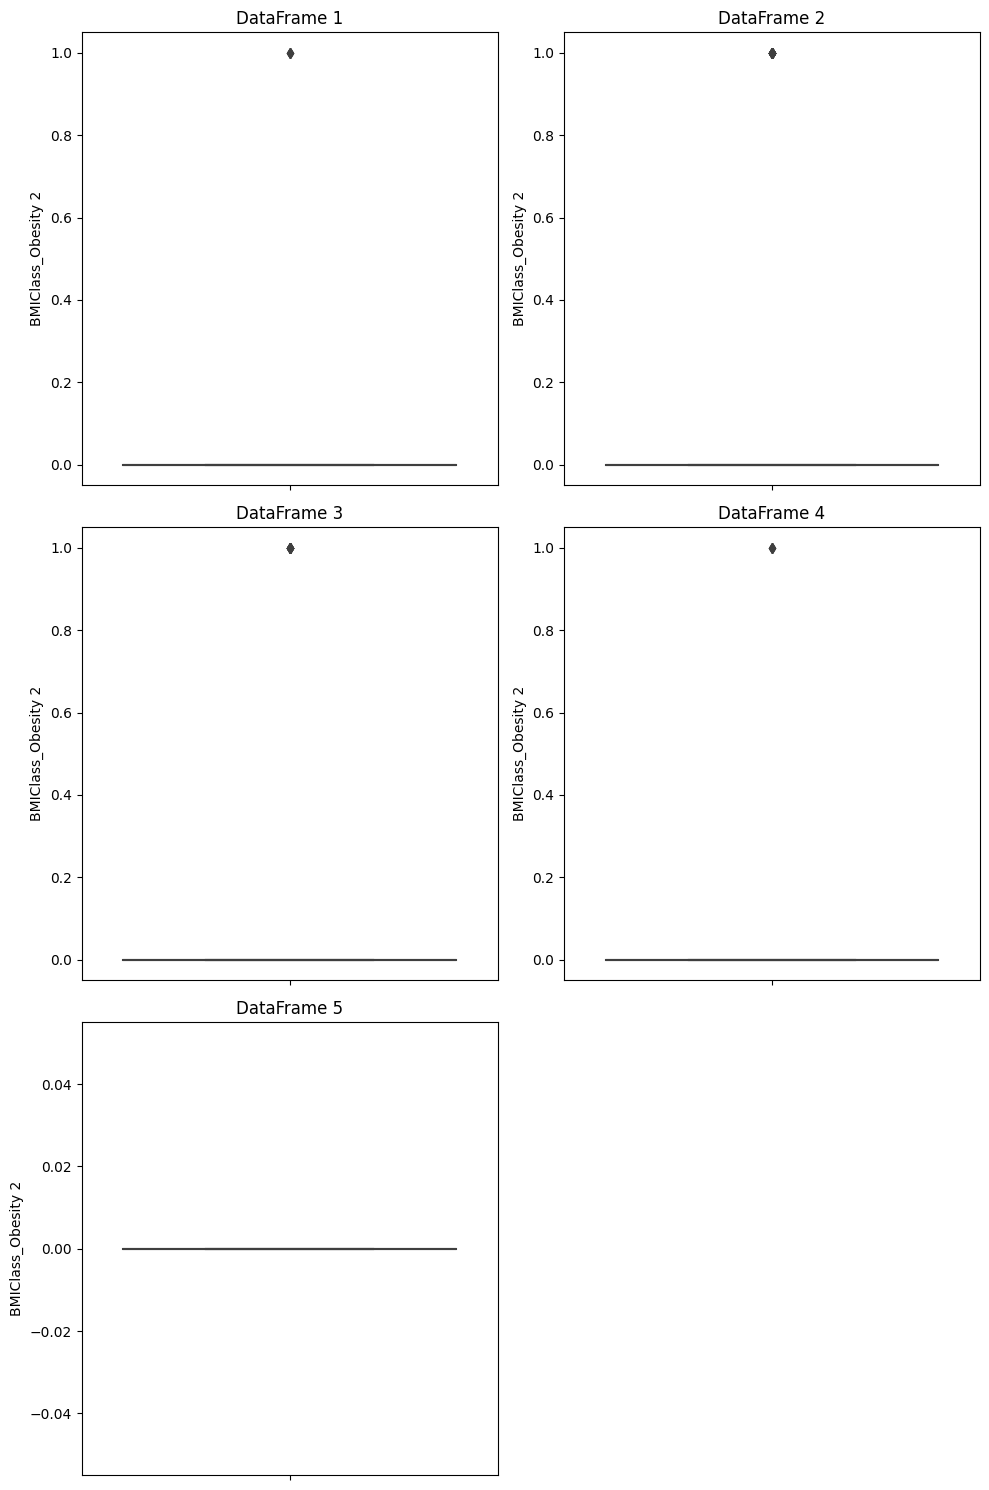

birth_MAYBE
Mean and Sum value of birth_MAYBE in DataFrame 1: 0.05, 2.00
Mean and Sum value of birth_MAYBE in DataFrame 2: 0.10, 15.00
Mean and Sum value of birth_MAYBE in DataFrame 3: 0.07, 8.00
Mean and Sum value of birth_MAYBE in DataFrame 4: 0.00, 0.00
Mean and Sum value of birth_MAYBE in DataFrame 5: 0.00, 0.00


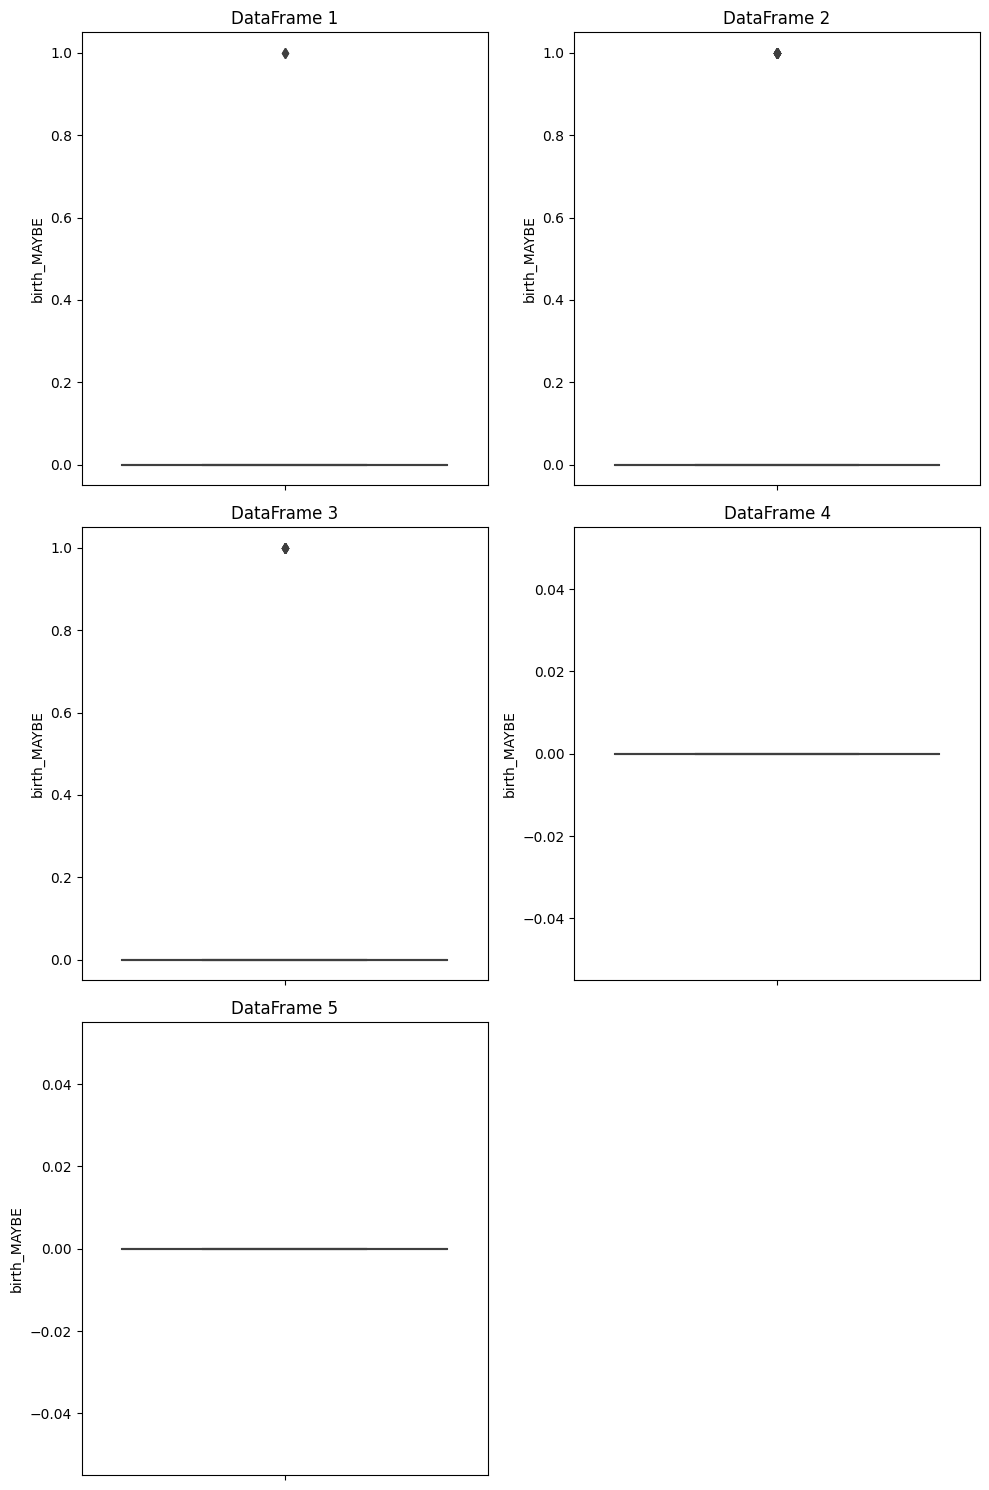

stress
Mean and Sum value of stress in DataFrame 1: 0.00, 0.00
Mean and Sum value of stress in DataFrame 2: 0.01, 2.00
Mean and Sum value of stress in DataFrame 3: 0.03, 4.00
Mean and Sum value of stress in DataFrame 4: 0.00, 0.00
Mean and Sum value of stress in DataFrame 5: 0.00, 0.00


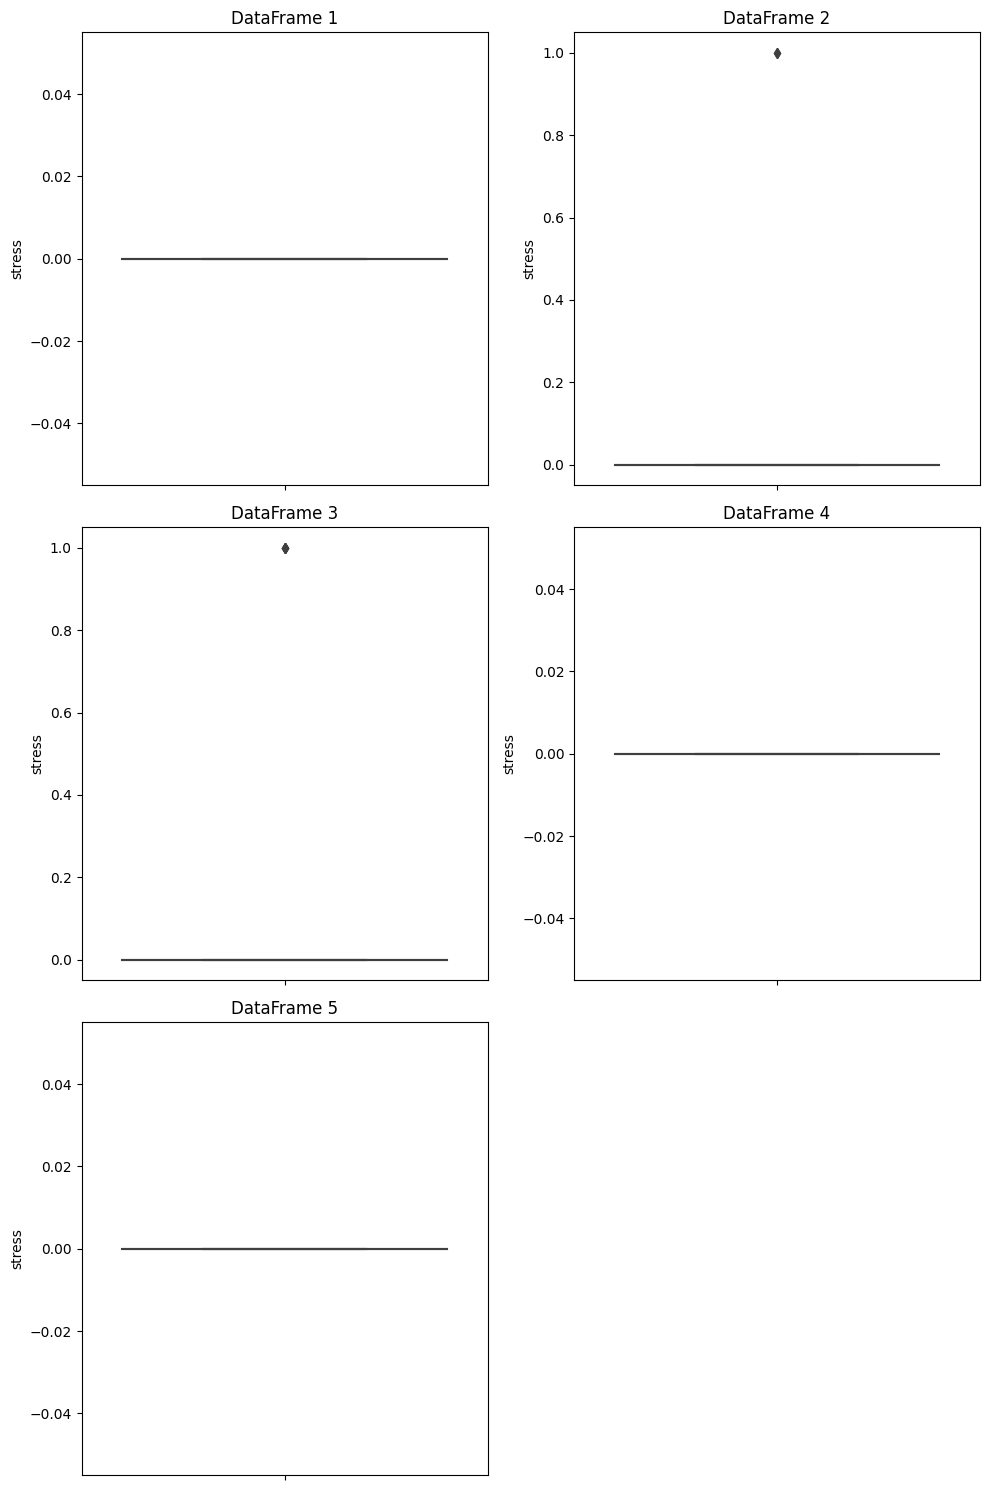

ALCOHOL
Mean and Sum value of ALCOHOL in DataFrame 1: 0.00, 0.00
Mean and Sum value of ALCOHOL in DataFrame 2: 0.03, 4.00
Mean and Sum value of ALCOHOL in DataFrame 3: 0.01, 1.00
Mean and Sum value of ALCOHOL in DataFrame 4: 0.00, 0.00
Mean and Sum value of ALCOHOL in DataFrame 5: 0.00, 0.00


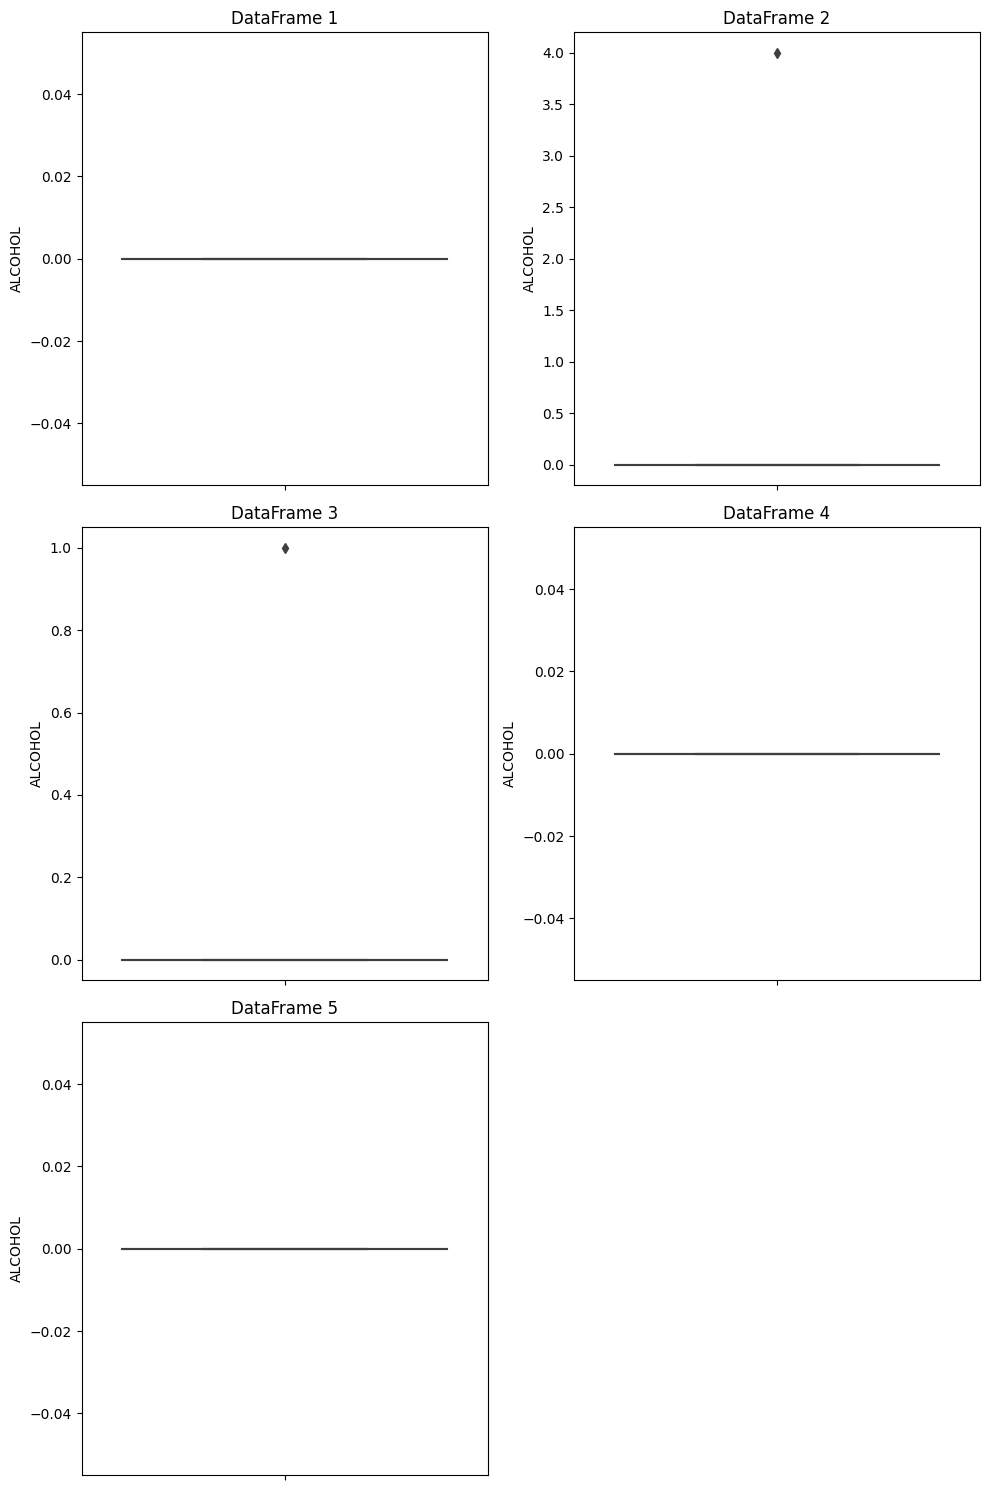

hasEverHadWeightGoal
Mean and Sum value of hasEverHadWeightGoal in DataFrame 1: 0.34, 14.00
Mean and Sum value of hasEverHadWeightGoal in DataFrame 2: 0.14, 21.00
Mean and Sum value of hasEverHadWeightGoal in DataFrame 3: 0.37, 46.00
Mean and Sum value of hasEverHadWeightGoal in DataFrame 4: 0.20, 9.00
Mean and Sum value of hasEverHadWeightGoal in DataFrame 5: 0.14, 1.00


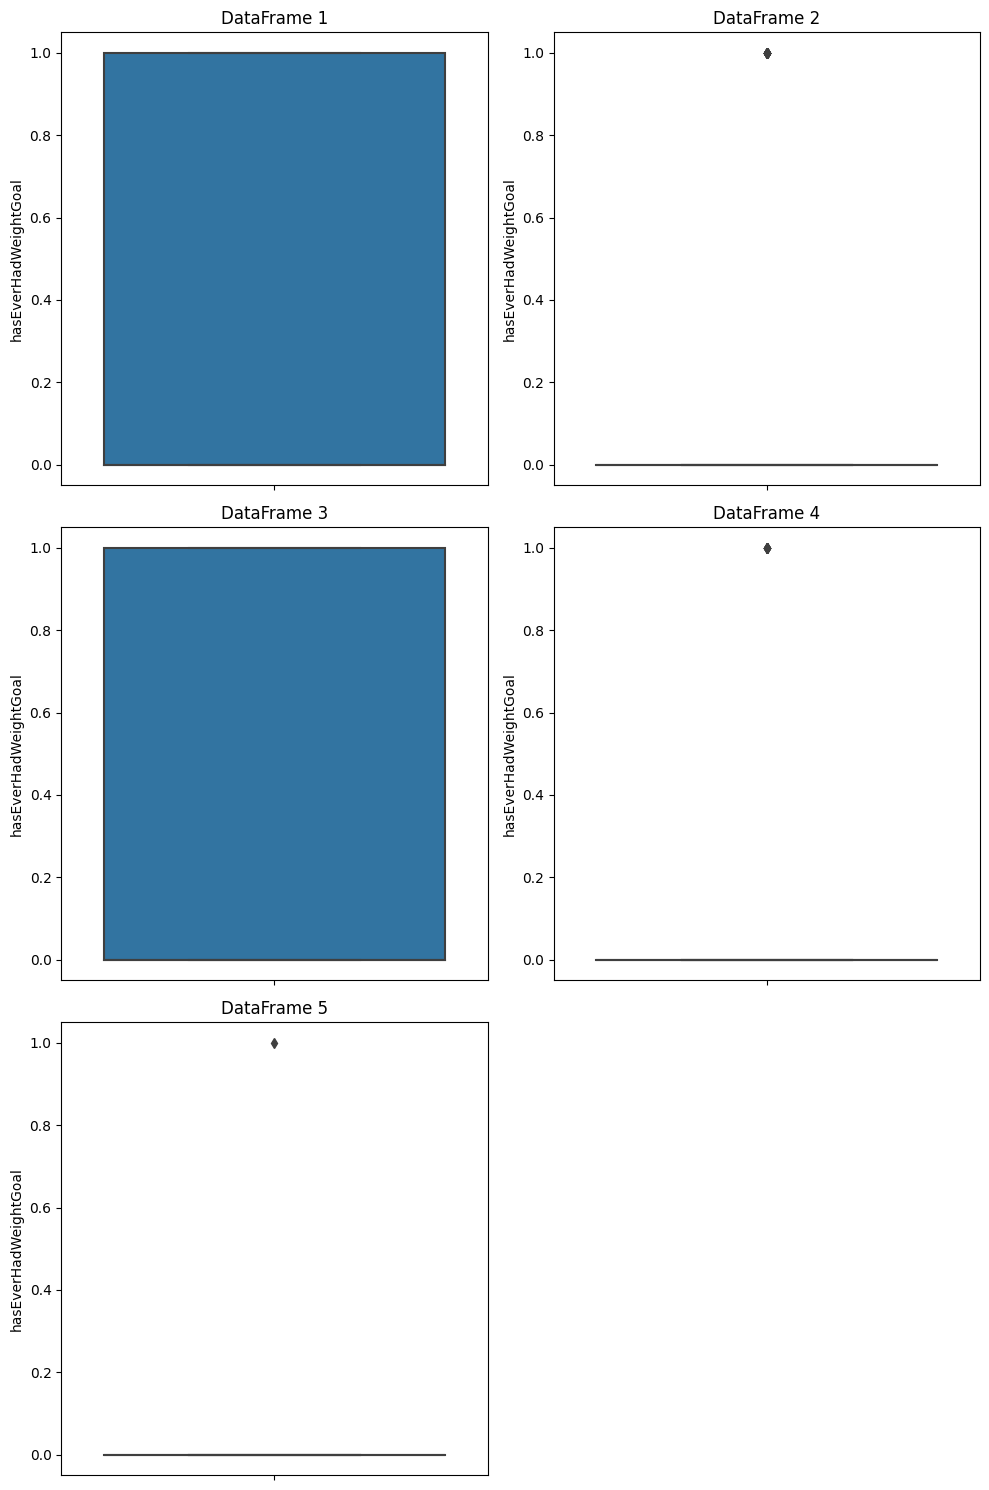

citizenHeight
Mean and Sum value of citizenHeight in DataFrame 1: 162.49, 6662.00
Mean and Sum value of citizenHeight in DataFrame 2: 164.52, 25007.00
Mean and Sum value of citizenHeight in DataFrame 3: 165.58, 20366.00
Mean and Sum value of citizenHeight in DataFrame 4: 164.73, 7248.00
Mean and Sum value of citizenHeight in DataFrame 5: 168.29, 1178.00


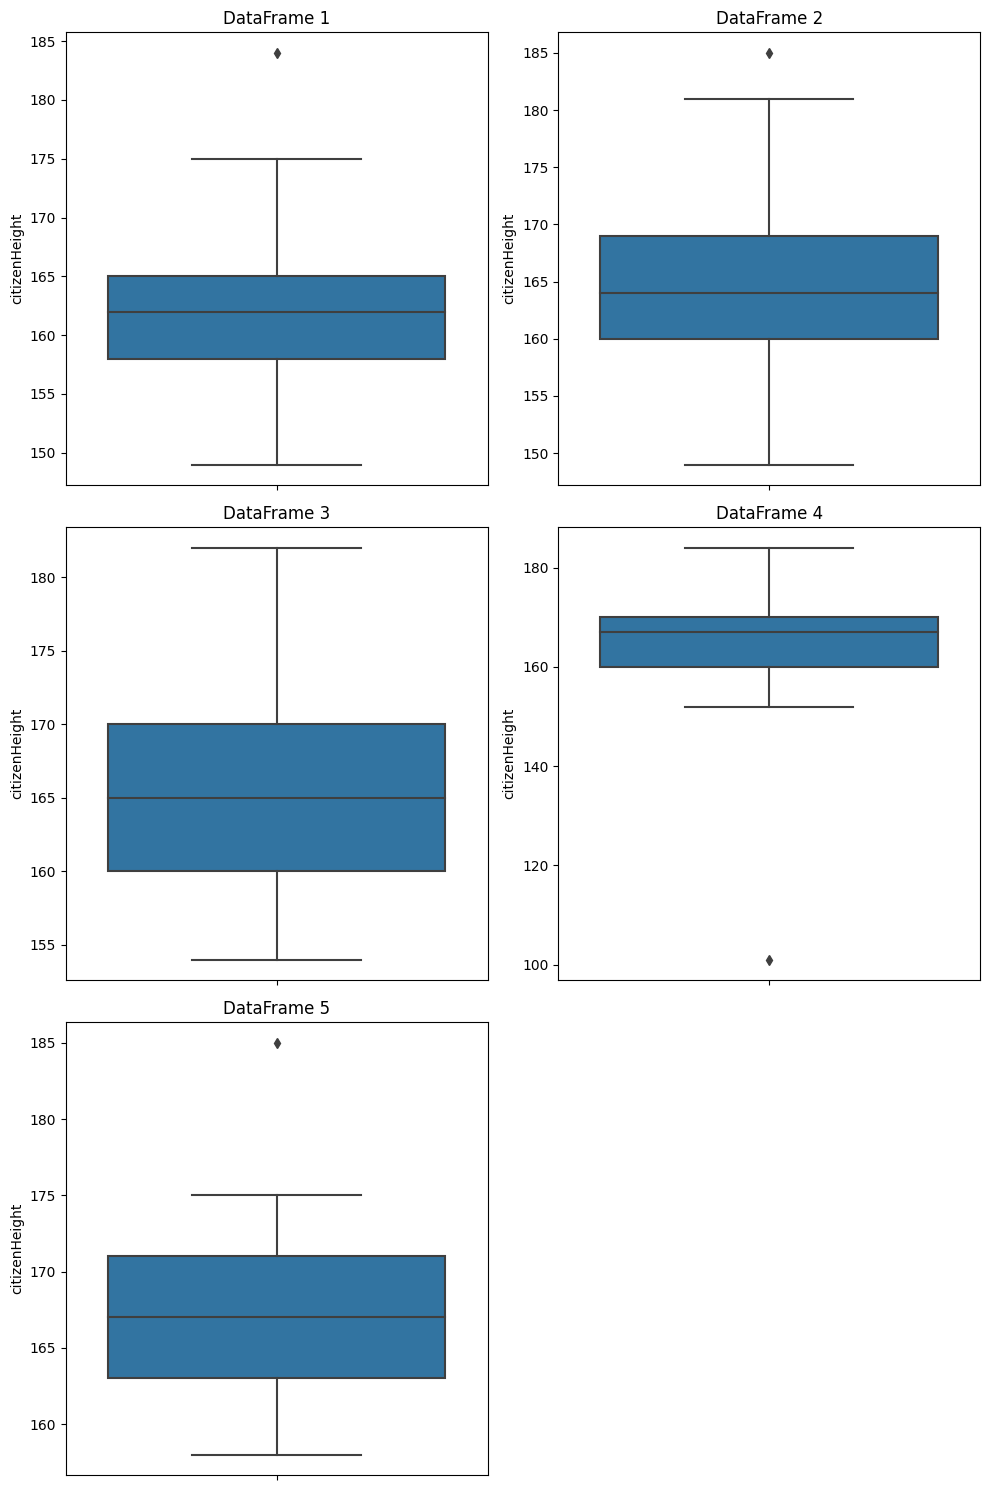

receivedMessageCount
Mean and Sum value of receivedMessageCount in DataFrame 1: 4.85, 199.00
Mean and Sum value of receivedMessageCount in DataFrame 2: 2.02, 307.00
Mean and Sum value of receivedMessageCount in DataFrame 3: 3.48, 428.00
Mean and Sum value of receivedMessageCount in DataFrame 4: 4.05, 178.00
Mean and Sum value of receivedMessageCount in DataFrame 5: 0.00, 0.00


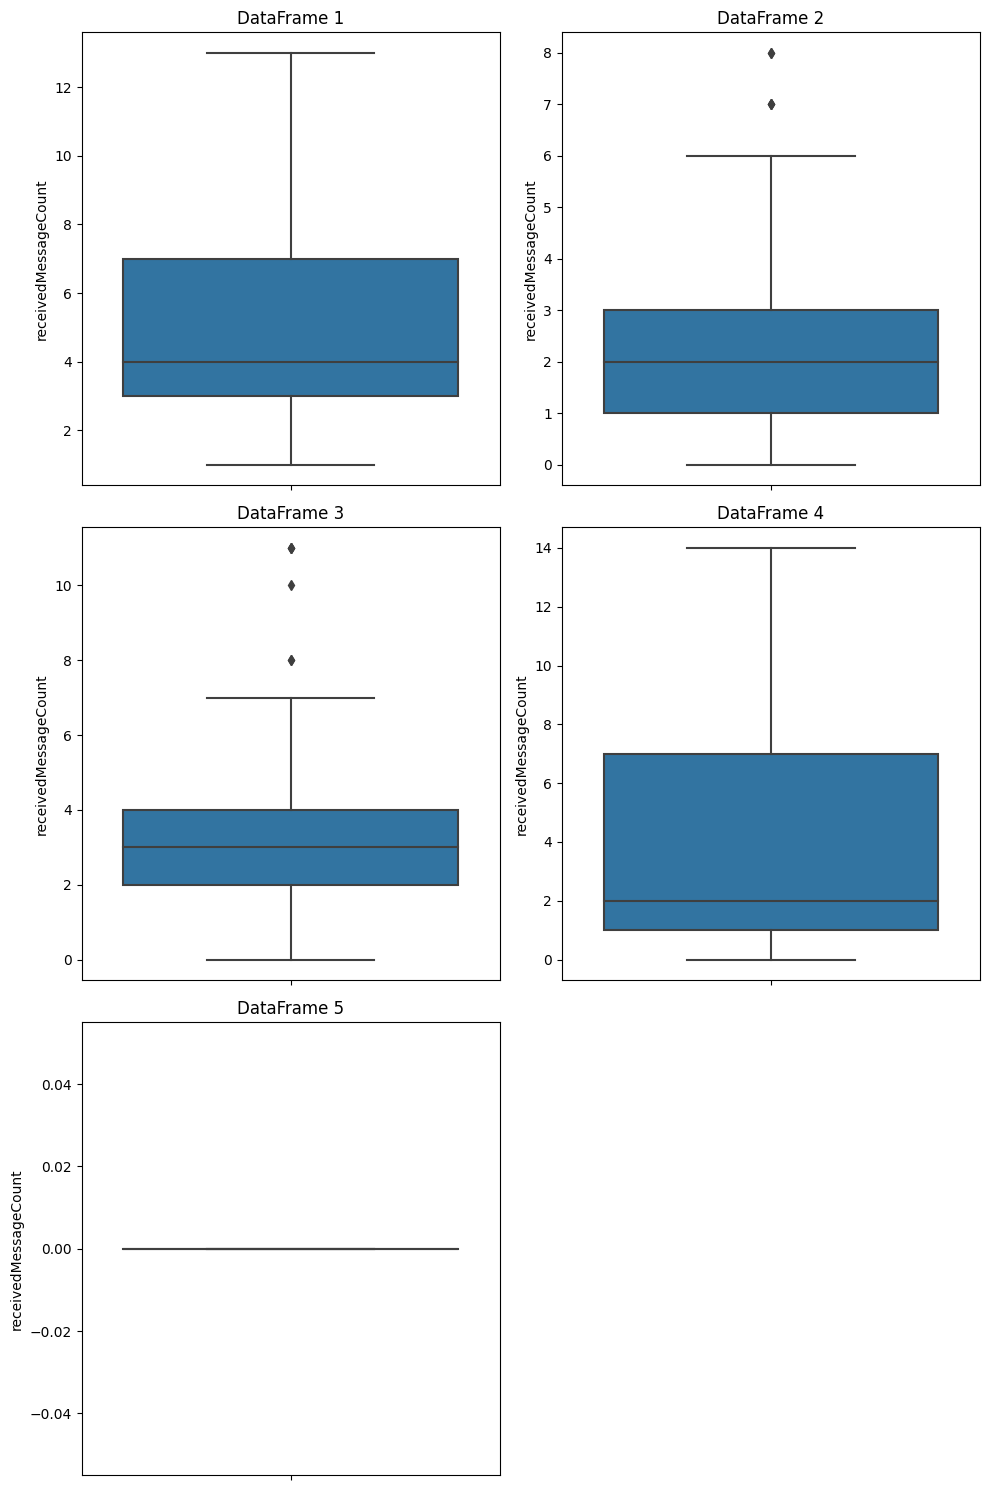

max_messagetext_length
Mean and Sum value of max_messagetext_length in DataFrame 1: 5159.93, 211557.00
Mean and Sum value of max_messagetext_length in DataFrame 2: 1336.13, 203092.00
Mean and Sum value of max_messagetext_length in DataFrame 3: 1598.86, 196660.00
Mean and Sum value of max_messagetext_length in DataFrame 4: 1083.07, 47655.00
Mean and Sum value of max_messagetext_length in DataFrame 5: 42.71, 299.00


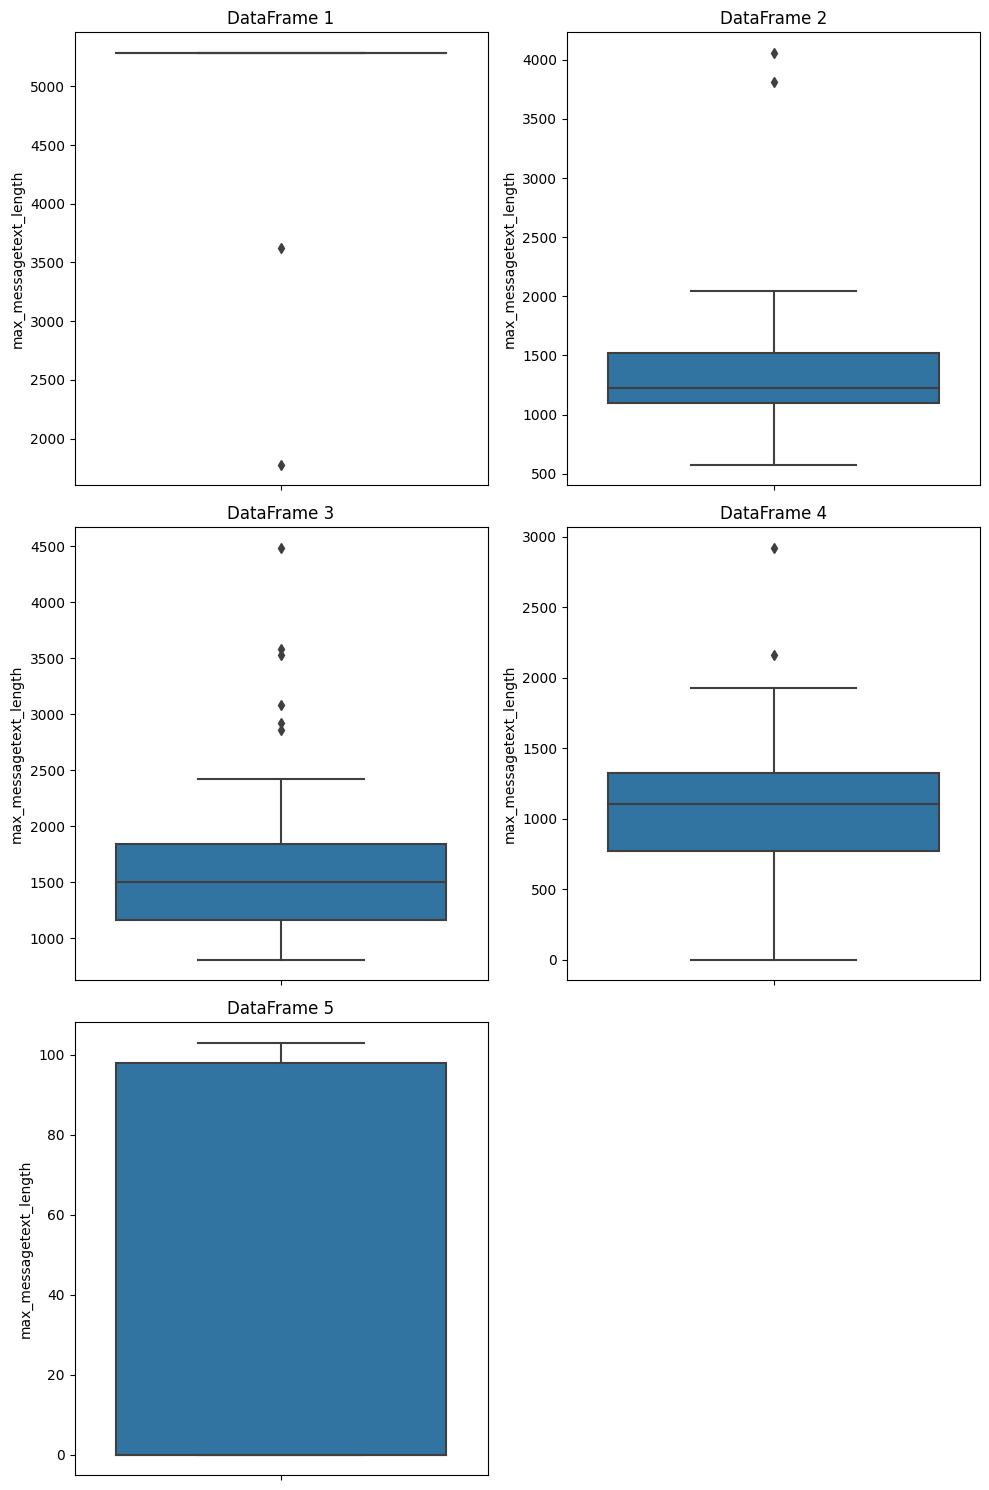

hasEndedAdvisory
Mean and Sum value of hasEndedAdvisory in DataFrame 1: 1.00, 41.00
Mean and Sum value of hasEndedAdvisory in DataFrame 2: 0.81, 123.00
Mean and Sum value of hasEndedAdvisory in DataFrame 3: 0.93, 115.00
Mean and Sum value of hasEndedAdvisory in DataFrame 4: 0.98, 43.00
Mean and Sum value of hasEndedAdvisory in DataFrame 5: 0.00, 0.00


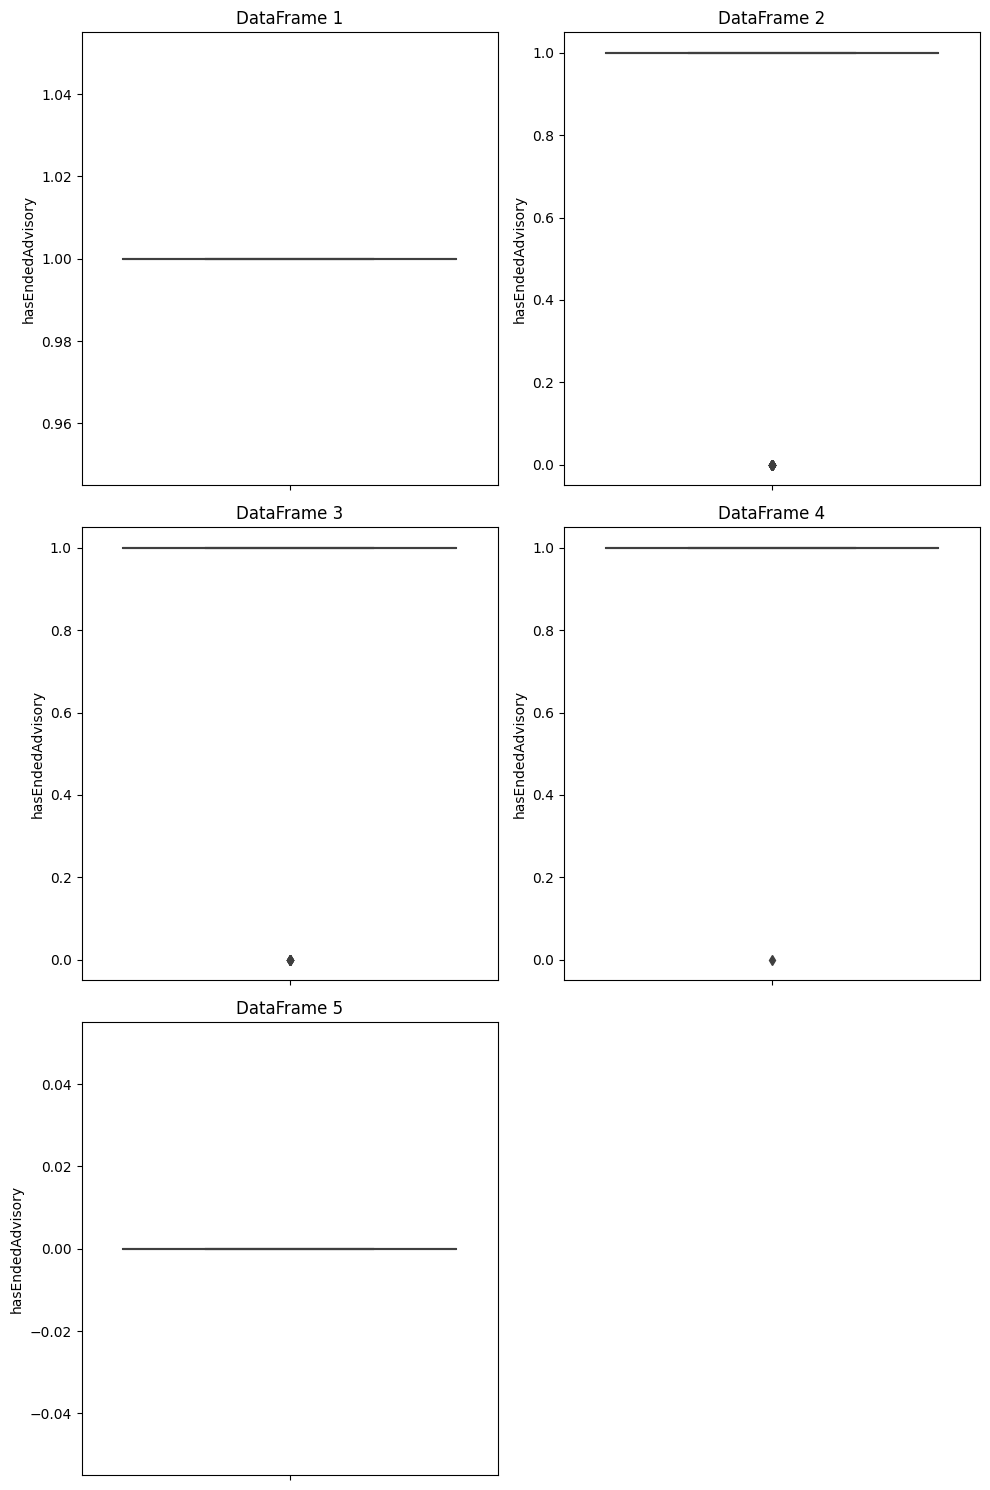

MEDICINE
Mean and Sum value of MEDICINE in DataFrame 1: 20.37, 835.00
Mean and Sum value of MEDICINE in DataFrame 2: 0.25, 38.00
Mean and Sum value of MEDICINE in DataFrame 3: 7.08, 871.00
Mean and Sum value of MEDICINE in DataFrame 4: 0.80, 35.00
Mean and Sum value of MEDICINE in DataFrame 5: 0.00, 0.00


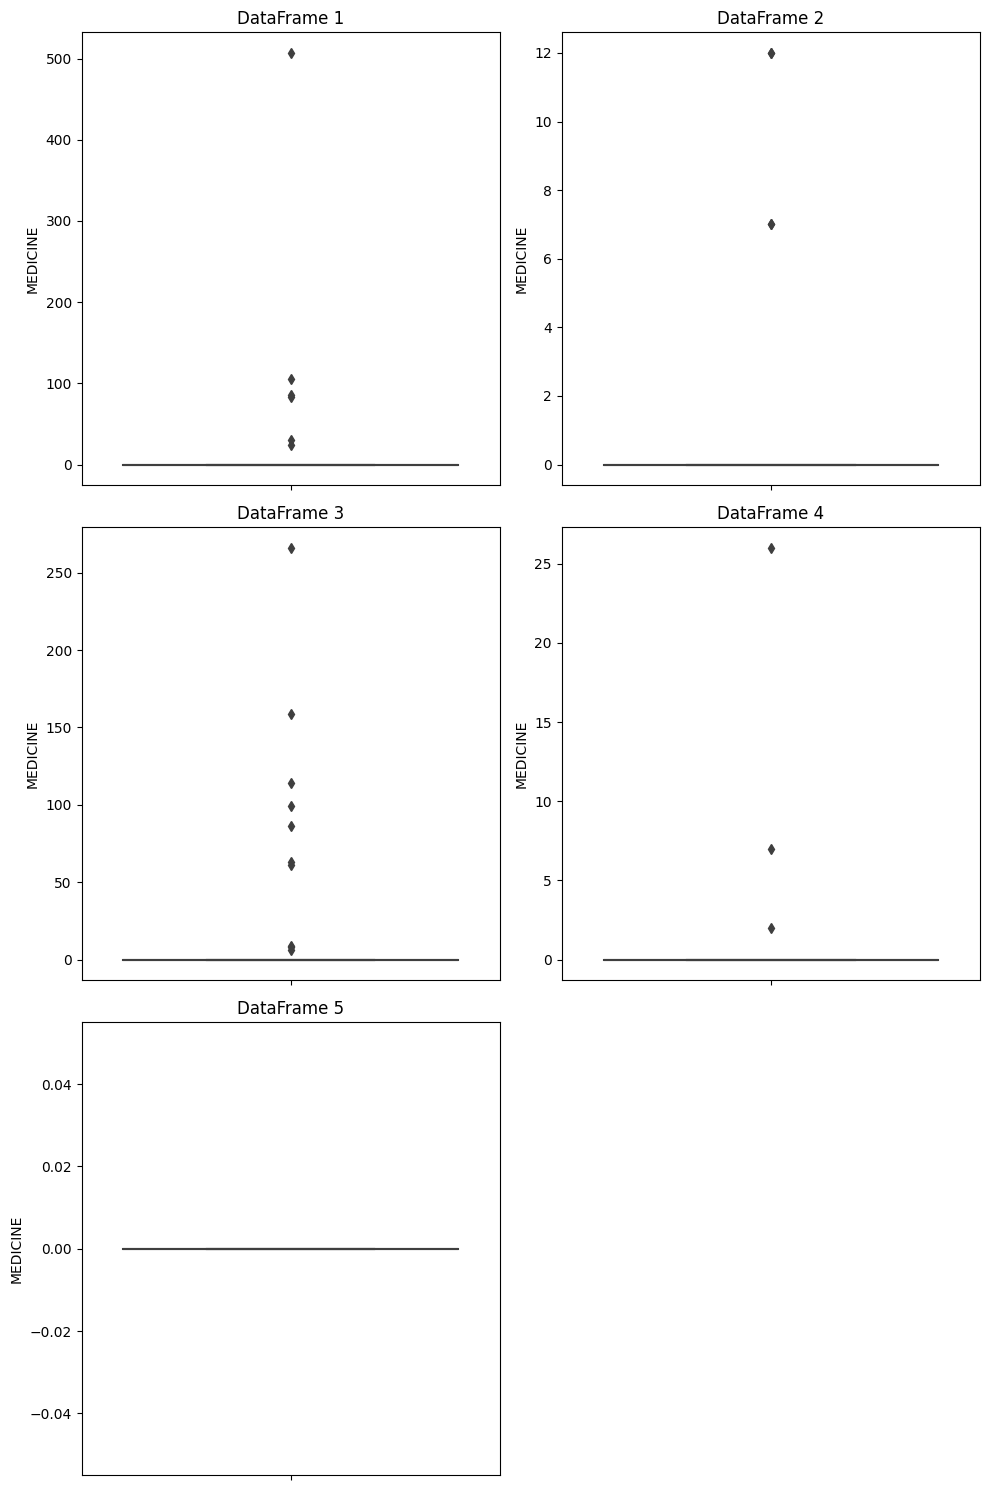

advisorId
Mean and Sum value of advisorId in DataFrame 1: 899688.20, 36887216.00
Mean and Sum value of advisorId in DataFrame 2: 869229.92, 132122948.00
Mean and Sum value of advisorId in DataFrame 3: 909048.63, 111812982.00
Mean and Sum value of advisorId in DataFrame 4: 861924.48, 37924677.00
Mean and Sum value of advisorId in DataFrame 5: 0.00, 0.00


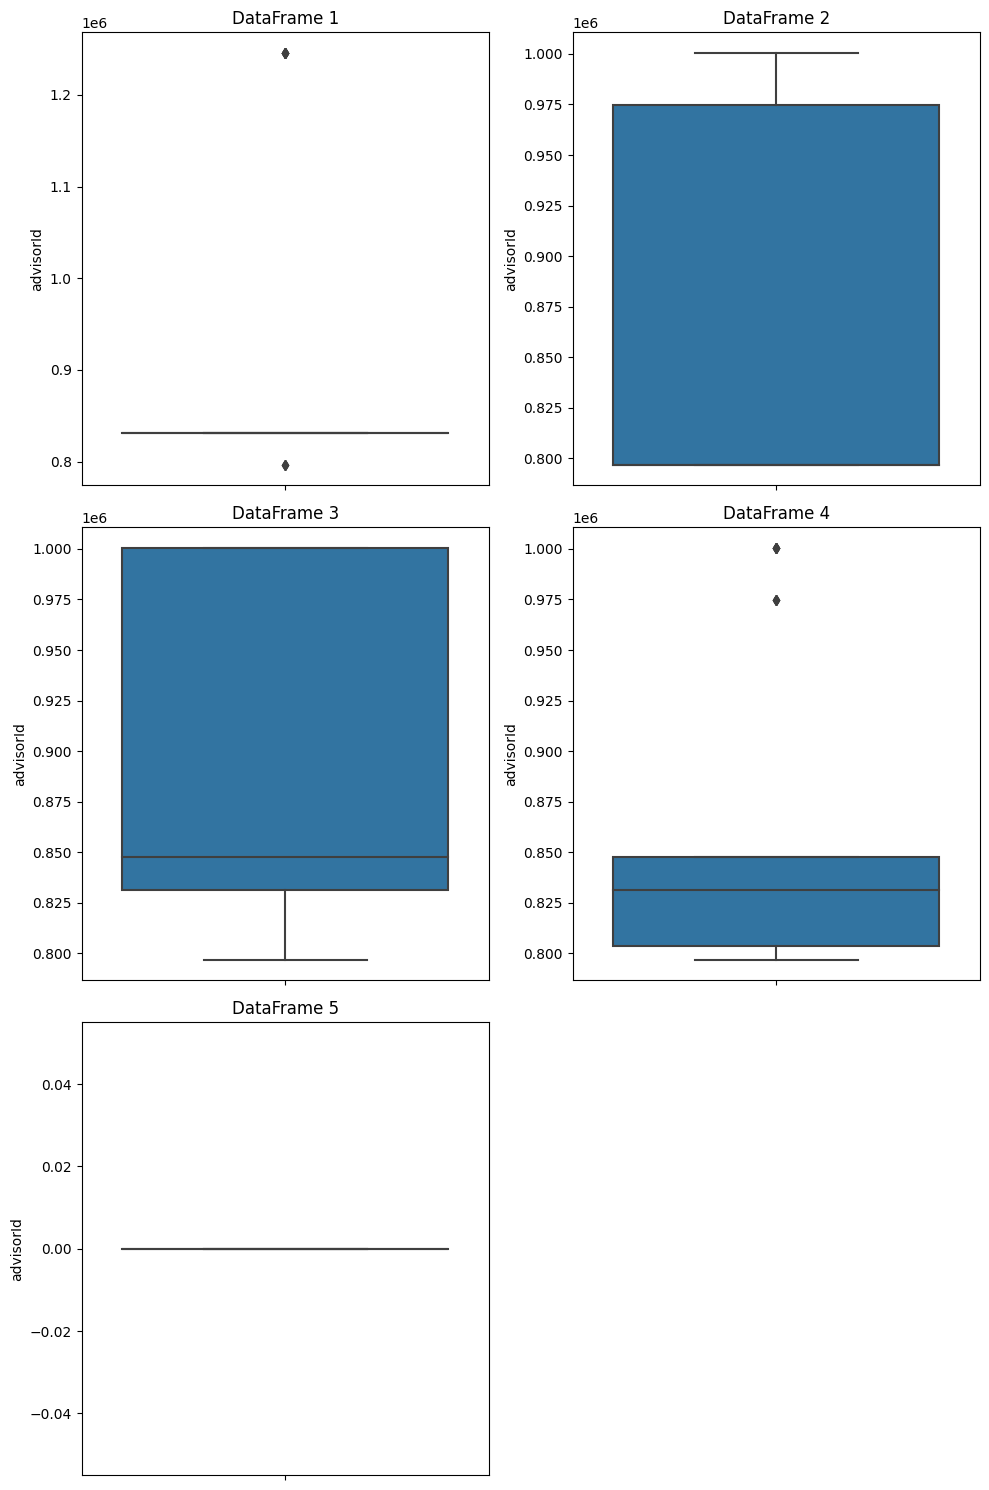

DIET_RULES
Mean and Sum value of DIET_RULES in DataFrame 1: 71.32, 2924.00
Mean and Sum value of DIET_RULES in DataFrame 2: 13.89, 2111.00
Mean and Sum value of DIET_RULES in DataFrame 3: 111.68, 13737.00
Mean and Sum value of DIET_RULES in DataFrame 4: 16.70, 735.00
Mean and Sum value of DIET_RULES in DataFrame 5: 0.00, 0.00


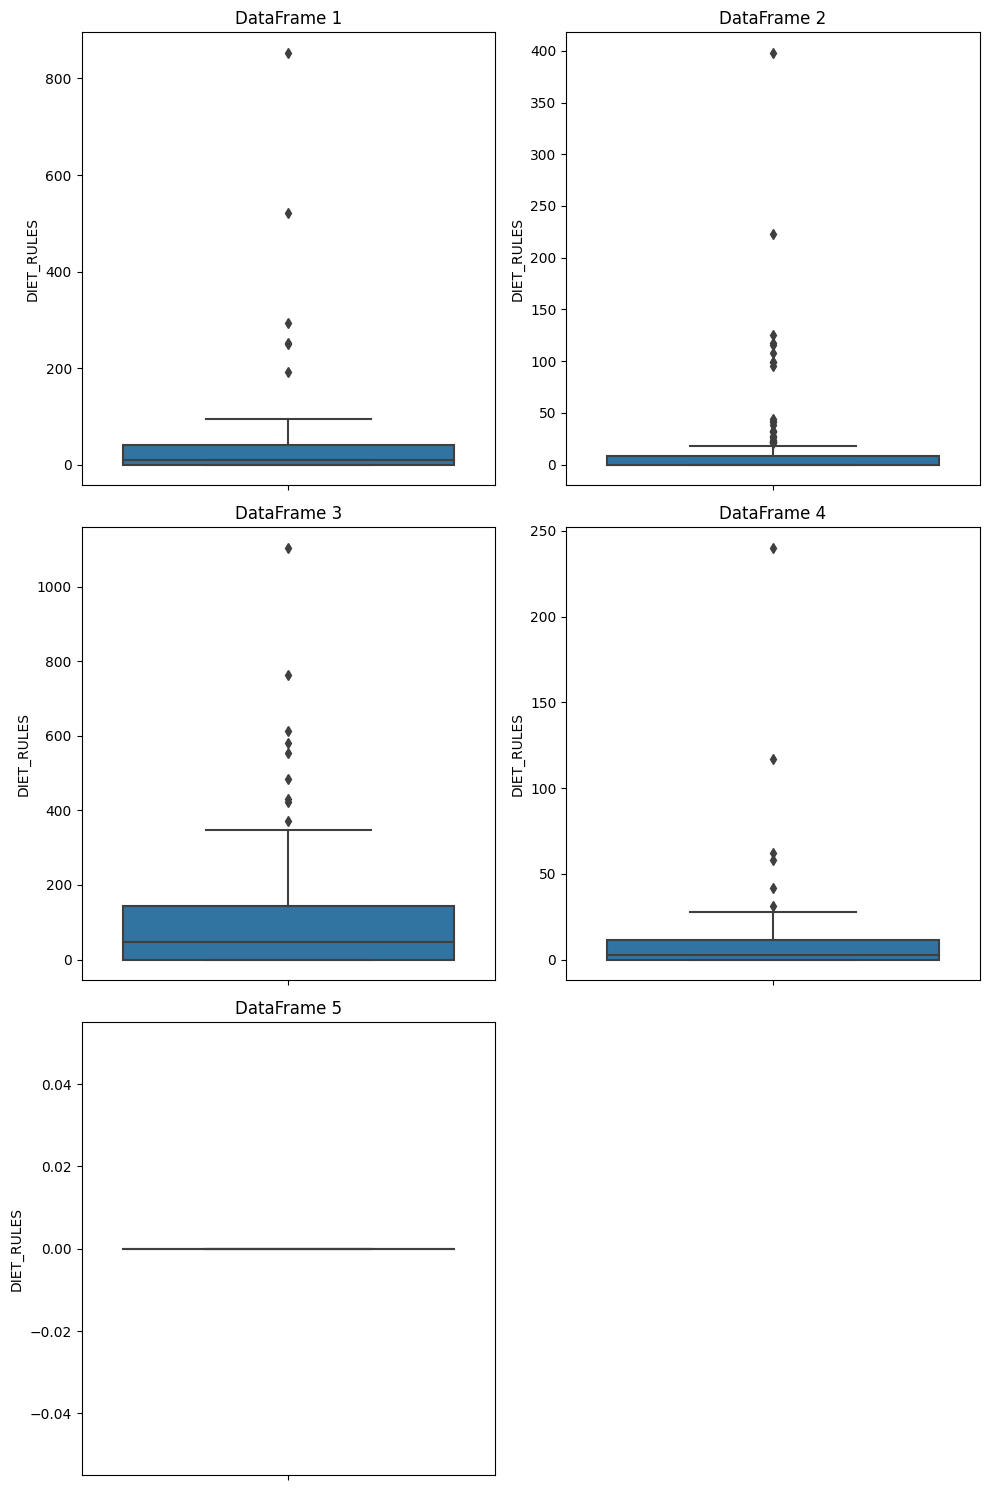

BMIClass_Underweight
Mean and Sum value of BMIClass_Underweight in DataFrame 1: 0.00, 0.00
Mean and Sum value of BMIClass_Underweight in DataFrame 2: 0.00, 0.00
Mean and Sum value of BMIClass_Underweight in DataFrame 3: 0.00, 0.00
Mean and Sum value of BMIClass_Underweight in DataFrame 4: 0.02, 1.00
Mean and Sum value of BMIClass_Underweight in DataFrame 5: 0.00, 0.00


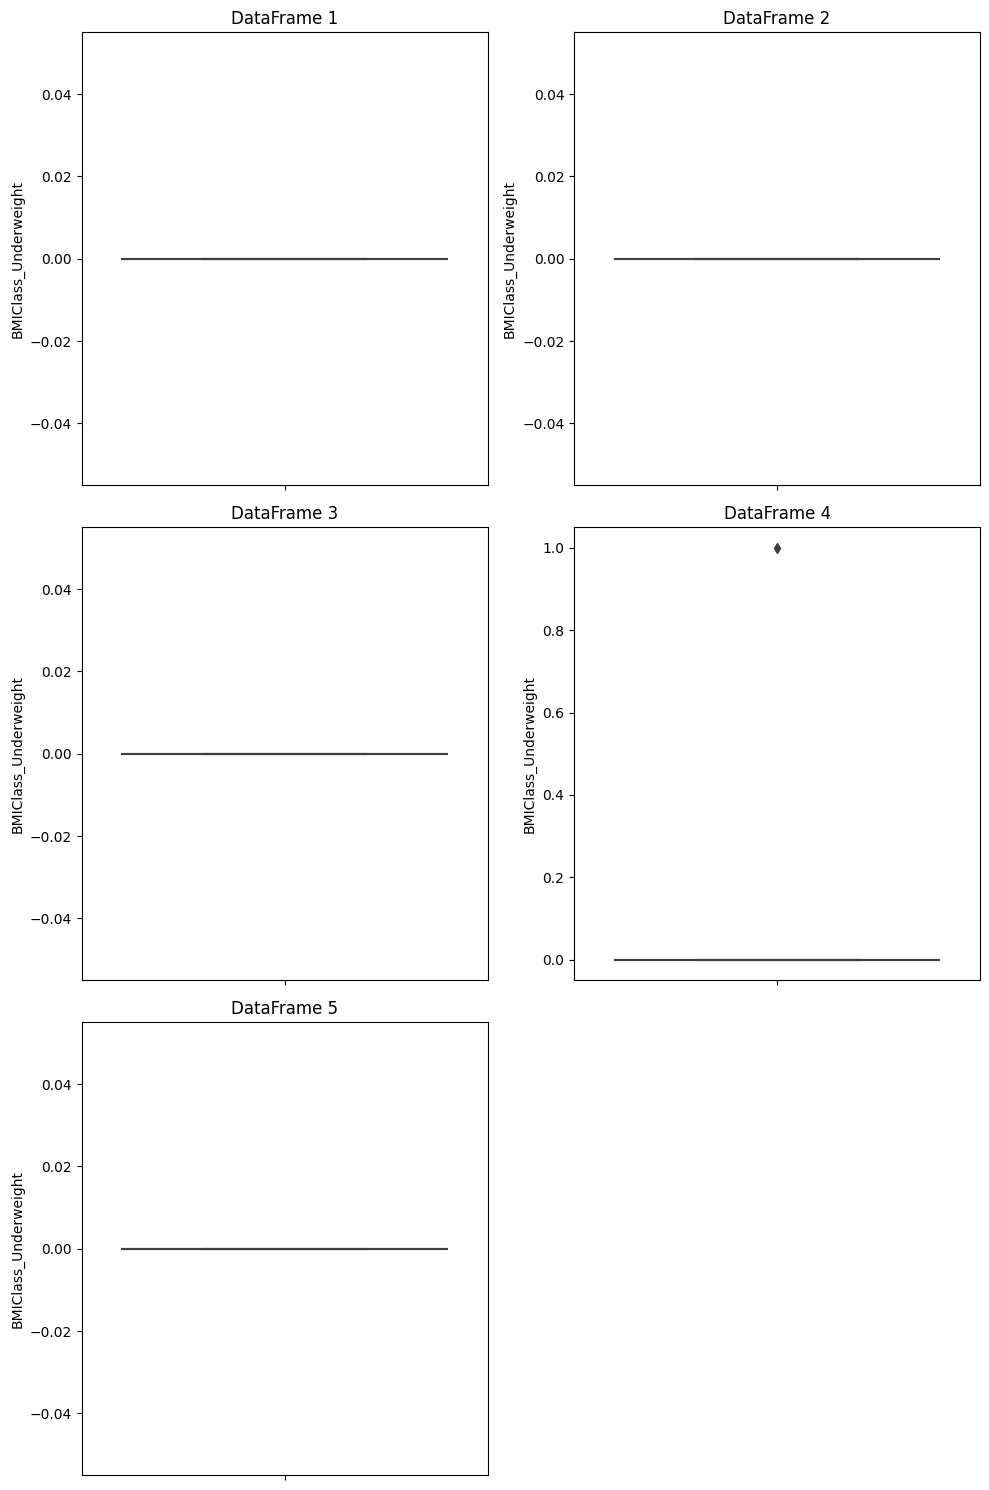

citizenId
Mean and Sum value of citizenId in DataFrame 1: 1043084.22, 42766453.00
Mean and Sum value of citizenId in DataFrame 2: 1005638.99, 152857126.00
Mean and Sum value of citizenId in DataFrame 3: 949486.93, 116786893.00
Mean and Sum value of citizenId in DataFrame 4: 905679.89, 39849915.00
Mean and Sum value of citizenId in DataFrame 5: 977762.86, 6844340.00


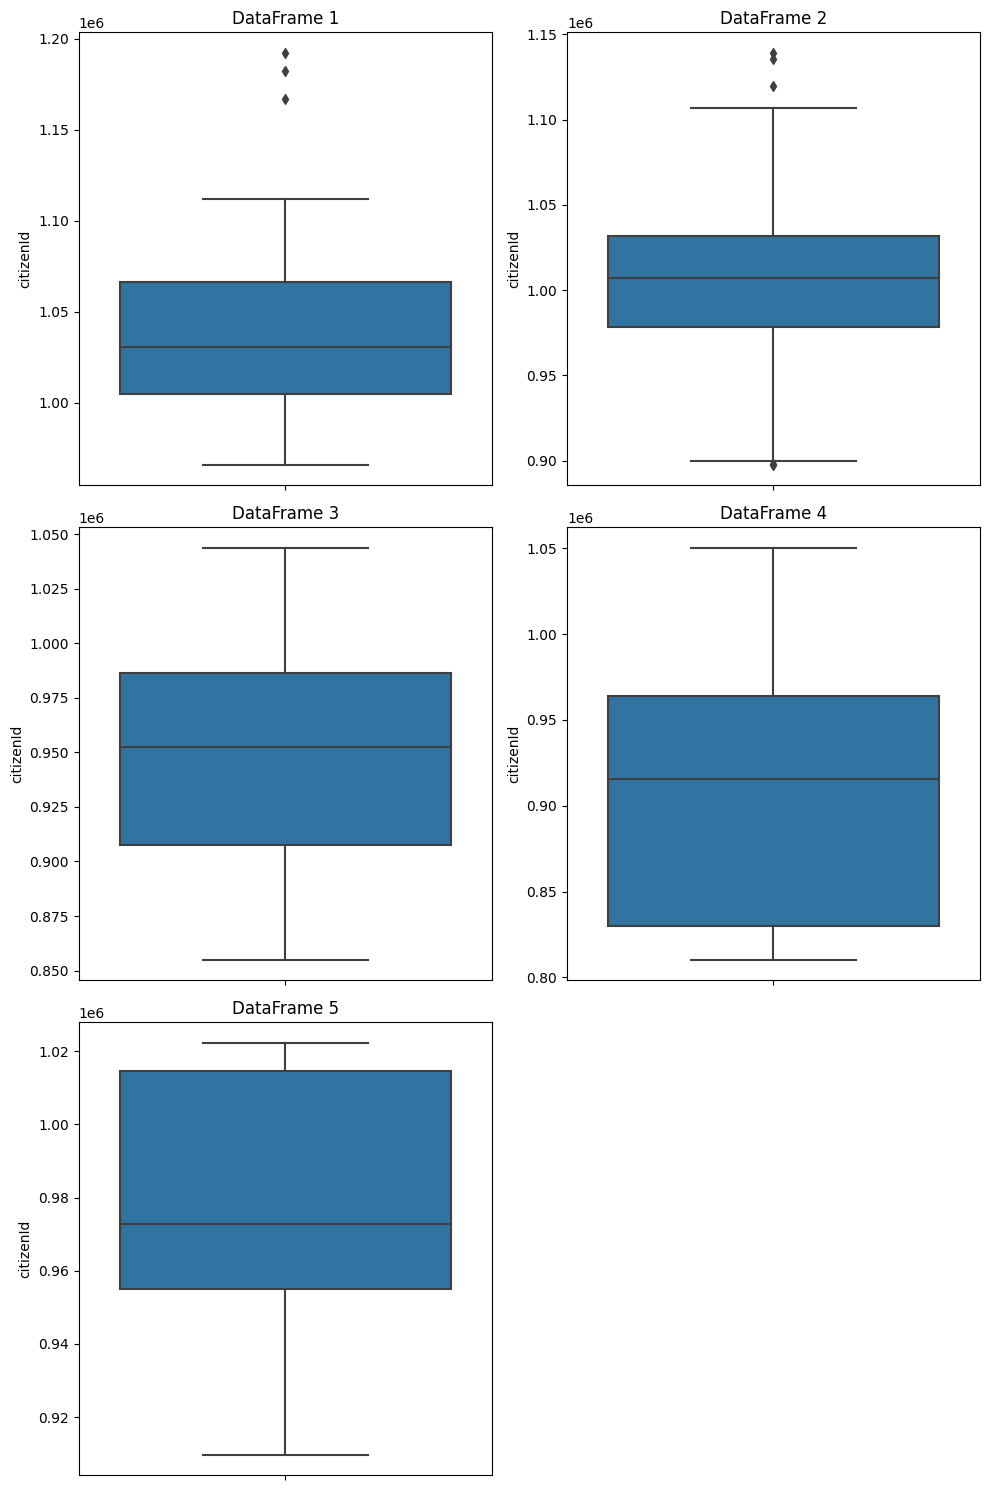

hasEverHadActivityGoal
Mean and Sum value of hasEverHadActivityGoal in DataFrame 1: 0.93, 38.00
Mean and Sum value of hasEverHadActivityGoal in DataFrame 2: 0.62, 95.00
Mean and Sum value of hasEverHadActivityGoal in DataFrame 3: 0.92, 113.00
Mean and Sum value of hasEverHadActivityGoal in DataFrame 4: 0.80, 35.00
Mean and Sum value of hasEverHadActivityGoal in DataFrame 5: 0.14, 1.00


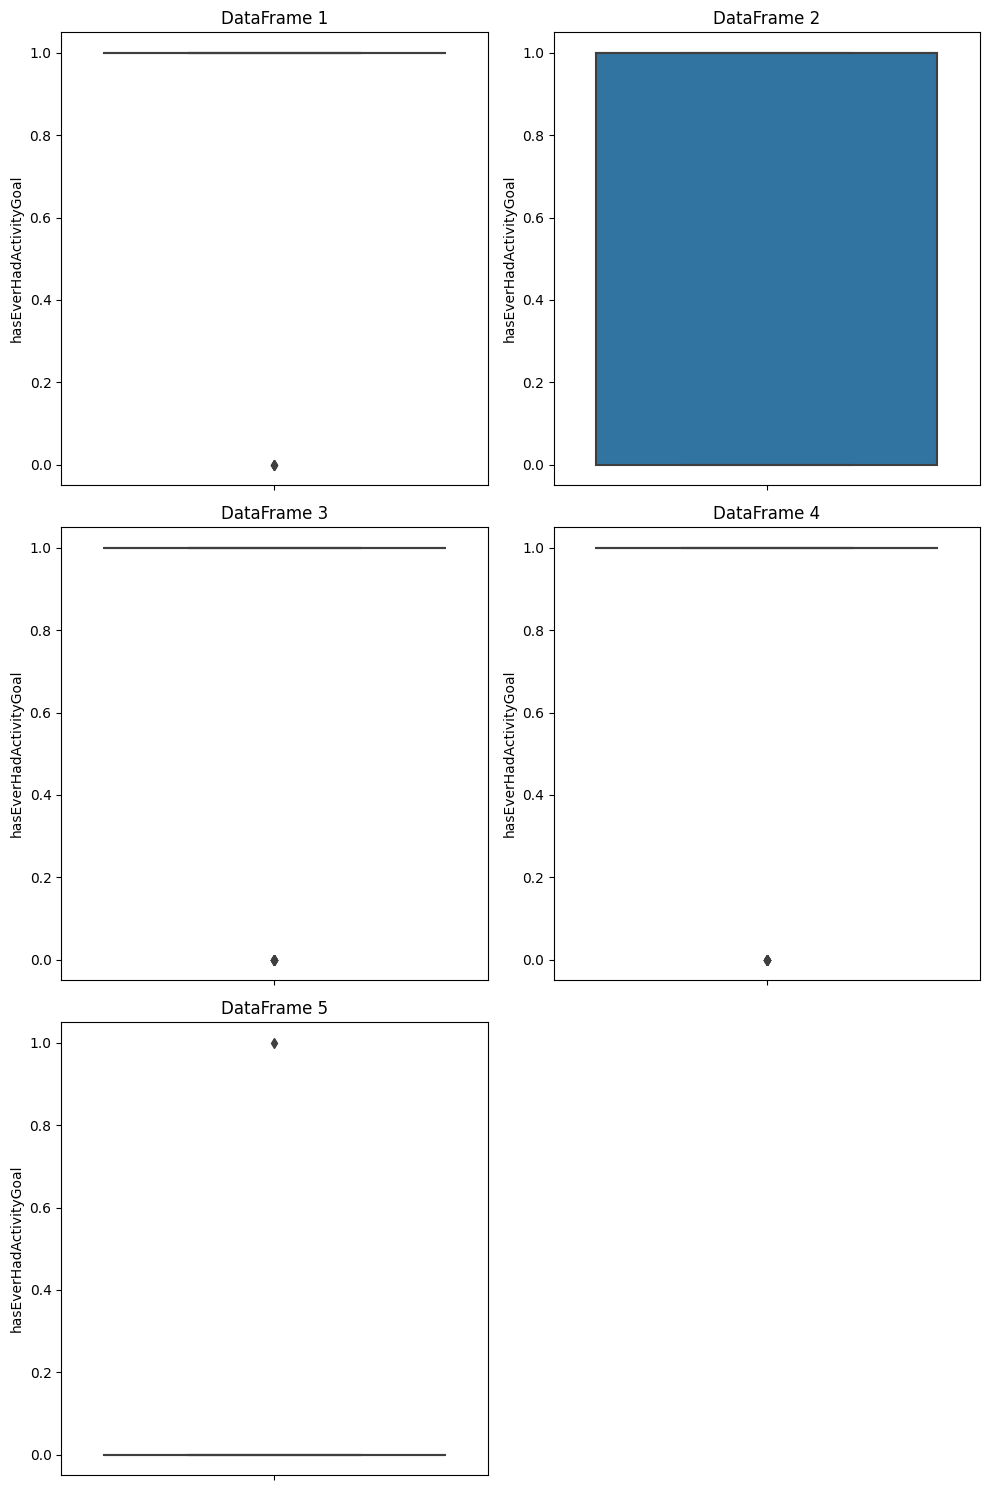

In [23]:
for col_name in loading_features:
    print(col_name)

    info(dfs, col_name)

    box_plot(dfs, col_name)


## Principal Components and Feature Loadings:

The loadings of the features on the principal components indicate the correlation between the original features and the principal component. A high loading of a feature on a principal component means that this feature has a strong influence on that principal component.
If a feature has the highest loading for all principal components in cluster 2, it means that this feature is very influential in determining the direction of the principal components for the data points in cluster 2.

## Average and Sum Values:

The average and sum values of a feature in a cluster give you an idea about the central tendency and the total value of that feature in that cluster, respectively.
Even if a feature has the highest loading on the principal components, it doesn't necessarily mean that its average or sum values will be the highest among all clusters. The loading tells you about the importance of the feature in defining the variance or structure of the data, not its magnitude.

## Interpreting the Discrepancy:

The fact that one feature in cluster 2 has the highest loading but not the highest average or sum value can be interpreted in several ways:

### a. The feature is very influential in determining the structure or variance of the data points in cluster 2, but its actual values might not be the highest.

### b. Other clusters might have a few data points with extremely high values for this feature, which could raise the average or sum for those clusters.

### c. The variance or spread of this feature's values in cluster 2 might be more consistent, making it more influential in the PCA transformation.